In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x= df.iloc[:,[2,3]].values
y= df.iloc[:, 4].values

print(x[:3,:])
print('-'*15)
print(y[:3])

[[   19 19000]
 [   35 20000]
 [   26 43000]]
---------------
[0 0 0]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

print(x_train[:3])
print('-'*15)
print(y_train[:3])
print('-'*15)
print(x_test[:3])
print('-'*15)
print(y_test[:3])


[[    44  39000]
 [    32 120000]
 [    38  50000]]
---------------
[0 1 0]
---------------
[[   30 87000]
 [   38 50000]
 [   35 75000]]
---------------
[0 0 0]


In [11]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

print(x_train[:3])
print('-'*15)
print(x_test[:3])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]]
---------------
[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]]


In [15]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print(x_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]]
---------------
[0 0 0 0 0 0 0 1 0 1]


In [16]:
print(y_pred[:20])
print(y_test[:20])

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[63  5]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


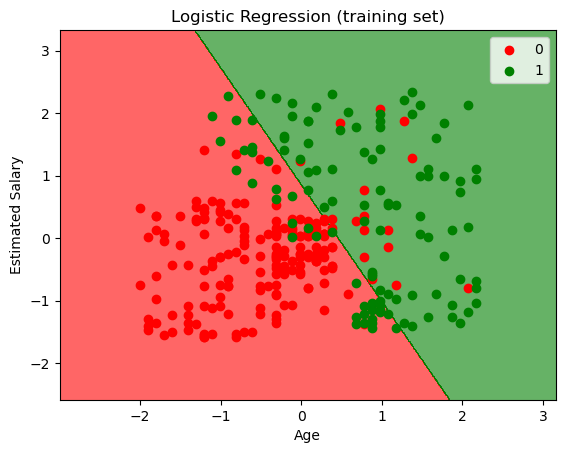

In [24]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                  np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.6,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression (training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
